<a href="https://colab.research.google.com/github/AndreaRossiUniVR/Massive_Dataset_Extraction_FIGH/blob/main/FIGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download REPO**

In [1]:
!git clone https://github.com/AndreaRossiUniVR/Massive_Dataset_Extraction_FIGH.git

Cloning into 'Massive_Dataset_Extraction_FIGH'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 64 (delta 25), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (64/64), 7.48 MiB | 6.30 MiB/s, done.


**Set Up the Env**

In [2]:
!pip install PyPDF2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 10.0 MB/s eta 0:00:00


In [3]:
import os

os.chdir('./Massive_Dataset_Extraction_FIGH')

*Download DATASET*


In [4]:
!python download.py

Downloaded and saved Dataset_FIGH/50678.pdf
Downloaded and saved Dataset_FIGH/50679.pdf
Downloaded and saved Dataset_FIGH/50680.pdf
Downloaded and saved Dataset_FIGH/50681.pdf
Downloaded and saved Dataset_FIGH/50682.pdf
Downloaded and saved Dataset_FIGH/50683.pdf
Downloaded and saved Dataset_FIGH/50684.pdf
Downloaded and saved Dataset_FIGH/50685.pdf
Downloaded and saved Dataset_FIGH/50686.pdf
Downloaded and saved Dataset_FIGH/50687.pdf
Downloaded and saved Dataset_FIGH/50688.pdf
Downloaded and saved Dataset_FIGH/50689.pdf
Downloaded and saved Dataset_FIGH/50690.pdf
Downloaded and saved Dataset_FIGH/50691.pdf
Downloaded and saved Dataset_FIGH/50692.pdf
Downloaded and saved Dataset_FIGH/50693.pdf
Downloaded and saved Dataset_FIGH/50694.pdf
Downloaded and saved Dataset_FIGH/50695.pdf
Downloaded and saved Dataset_FIGH/50696.pdf
Downloaded and saved Dataset_FIGH/50697.pdf
Downloaded and saved Dataset_FIGH/50698.pdf
Downloaded and saved Dataset_FIGH/50699.pdf
Downloaded and saved Dataset_FIG

*Create DB*

In [9]:
import sqlite3

def setup_db():
    # Connect to the SQLite database (or create it if it doesn't exist)
    conn = sqlite3.connect('fighDB.db')

    # Create a cursor object
    c = conn.cursor()

    # Create table for Games
    c.execute('''
    CREATE TABLE Games (
        id INTEGER PRIMARY KEY,
        home_team_id TEXT,
        away_team_id TEXT,
        home_goals INTEGER,
        away_goals INTEGER,
        category TEXT,
        date TEXT
    )
''')

    # Create table for Teams
    c.execute('''
        CREATE TABLE Teams (
            id TEXT PRIMARY KEY,
            team_name TEXT,
            goals INTEGER,
            goals_against INTEGER,
            category TEXT
        )
    ''')

    # Create table for Players
    c.execute('''
    CREATE TABLE Players (
        id TEXT,
        team_id TEXT,
        game_id INTEGER,
        number INTEGER,
        name TEXT,
        goals INTEGER,
        FOREIGN KEY (team_id) REFERENCES Teams (id),
        FOREIGN KEY (game_id) REFERENCES Games (id),
        PRIMARY KEY (id, game_id)
      )
  ''')

    # Commit the changes and close the connection
    conn.commit()
    conn.close()

if __name__ == "__main__":
    setup_db()


*Data Cleaning + DB INSERT*

In [10]:
import os
import subprocess

# Folder containing the PDF files
pdf_folder = "Dataset_FIGH"

# Iterate through all files in the folder
for file in os.listdir(pdf_folder):
    # Check if the file is a PDF file
    if file.lower().endswith(".pdf"):
        # Construct the file path
        file_path = os.path.join(pdf_folder, file)

        try:
            # Call the read.py script with the PDF file as an argument
            output = subprocess.check_output(["python", "read.py", file_path])

            # Display the output in the notebook cell output
            print(output.decode())

        except subprocess.CalledProcessError as e:
            # Handle the error
            print(f"Error processing file: {file_path}")
            print(f"Error message: {e}")

            # Continue to the next iteration of the loop
            continue


commit
[['Dataset_FIGH/50731.pdf', '50731', '14/12/2022', 'SERIE A GOLD MASCHILE', ''], ['SECCHIA RUBIERA', 28, 24, [{'number': '2', 'name': 'Bartoli, Davide', 'goals': '0'}, {'number': '4', 'name': 'Bortolotti, Luca', 'goals': '0'}, {'number': '5', 'name': 'Pagano, Robertino', 'goals': '4'}, {'number': '12', 'name': 'Cavina, Matteo', 'goals': '1'}, {'number': '13', 'name': 'Bartoli, Roberto', 'goals': '0'}, {'number': '17', 'name': 'Hila, Pashko', 'goals': '1'}, {'number': '29', 'name': 'Strada, Elio', 'goals': '0'}, {'number': '30', 'name': 'Bonassi, Stefano', 'goals': '0'}, {'number': '31', 'name': 'Voliuvach, Maksym', 'goals': '0'}, {'number': '40', 'name': 'Oleari, Luca', 'goals': '4'}, {'number': '66', 'name': 'Patroncini, Simone', 'goals': '2'}, {'number': '91', 'name': 'Boni, Giacomo', 'goals': '0'}, {'number': '99', 'name': 'Pereira, Allan Luis', 'goals': '11'}], ''], ['CONVERSANO', 24, 28, [{'number': '6', 'name': 'Sciorsci, Gianpaolo', 'goals': '0'}, {'number': '7', 'name': 

**DEMO**

*Dislplaing Player's advanced stats*


Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Dropdown(description='Team:', options=(), value=None)

Dropdown(description='Player:', options=(), value=None)

Button(description='Confirm Category', style=ButtonStyle())

Button(description='Confirm Team', style=ButtonStyle())

Button(description='Confirm Player', style=ButtonStyle())

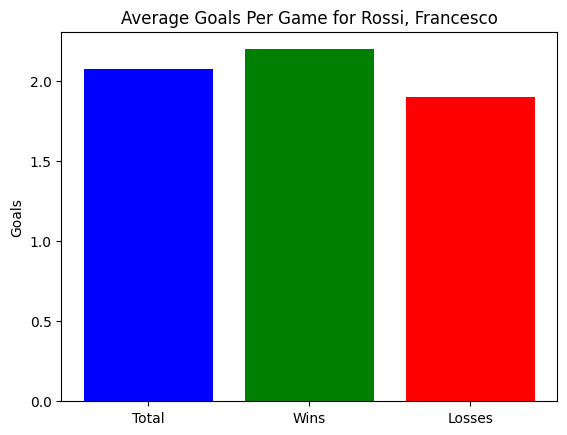

[2.076923076923077, 2.2, 1.9]


In [39]:
import sqlite3
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create the team dropdown menu (empty for now)
team_dropdown = widgets.Dropdown(description='Team:')
display(team_dropdown)

# Create the player dropdown menu (empty for now)
player_dropdown = widgets.Dropdown(description='Player:')
display(player_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

# Function to update the team dropdown menu once a category is selected and confirmed
def update_teams(button):
    c.execute("SELECT team_name FROM Teams WHERE category=?", (category_dropdown.value,))
    teams = [team[0] for team in c.fetchall()]
    team_dropdown.options = teams

# Set the function to be called when the category button is clicked
category_button.on_click(update_teams)

# Create a button to confirm the team selection
team_button = widgets.Button(description="Confirm Team")
display(team_button)

# Function to update the player dropdown menu once a team is selected and confirmed
def update_players(button):
    team_id = (team_dropdown.value + category_dropdown.value).replace(" ", "")
    c.execute("SELECT name FROM Players WHERE team_id=?", (team_id,))
    players = [player[0] for player in c.fetchall()]
    player_dropdown.options = players

# Set the function to be called when the team button is clicked
team_button.on_click(update_players)

# Function to display the player stats
def display_player_stats(button):
    team_id = (team_dropdown.value + category_dropdown.value).replace(" ", "")
    player_name = player_dropdown.value

    c.execute('''
        SELECT game_id, goals
        FROM Players
        WHERE team_id=? AND name=?
    ''', (team_id, player_name))
    goals_per_game = c.fetchall()

    c.execute('''
        SELECT p.game_id, p.goals
        FROM Players p
        INNER JOIN Games g ON p.game_id = g.id
        WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals > g.away_goals) OR (g.away_team_id=? AND g.away_goals > g.home_goals))
    ''', (team_id, player_name, team_dropdown.value, team_dropdown.value))
    goals_per_game_wins = c.fetchall()

    c.execute('''
        SELECT p.game_id, p.goals
        FROM Players p
        INNER JOIN Games g ON p.game_id = g.id
        WHERE p.team_id=? AND p.name=? AND ((g.home_team_id=? AND g.home_goals < g.away_goals) OR (g.away_team_id=? AND g.away_goals < g.home_goals))
    ''', (team_id, player_name, team_dropdown.value, team_dropdown.value))
    goals_per_game_losses = c.fetchall()

    total_goals = sum(goal[1] for goal in goals_per_game)
    average_goals = total_goals / len(goals_per_game)

    total_goals_wins = sum(goal[1] for goal in goals_per_game_wins)
    average_goals_wins = total_goals_wins / len(goals_per_game_wins) if goals_per_game_wins else 0

    total_goals_losses = sum(goal[1] for goal in goals_per_game_losses)
    average_goals_losses = total_goals_losses / len(goals_per_game_losses) if goals_per_game_losses else 0

    colors = ['blue','green', 'red']
    plt.bar(['Total', 'Wins', 'Losses'], [average_goals, average_goals_wins, average_goals_losses], color=colors)
    plt.title(f'Average Goals Per Game for {player_name}')
    plt.ylabel('Goals')
    plt.show()
    print([average_goals, average_goals_wins, average_goals_losses])
# Create a button to confirm the player selection
player_button = widgets.Button(description="Confirm Player")
display(player_button)

# Set the function to be called when the player button is clicked
player_button.on_click(display_player_stats)


*Goals Distribution*

Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Button(description='Confirm Category', style=ButtonStyle())

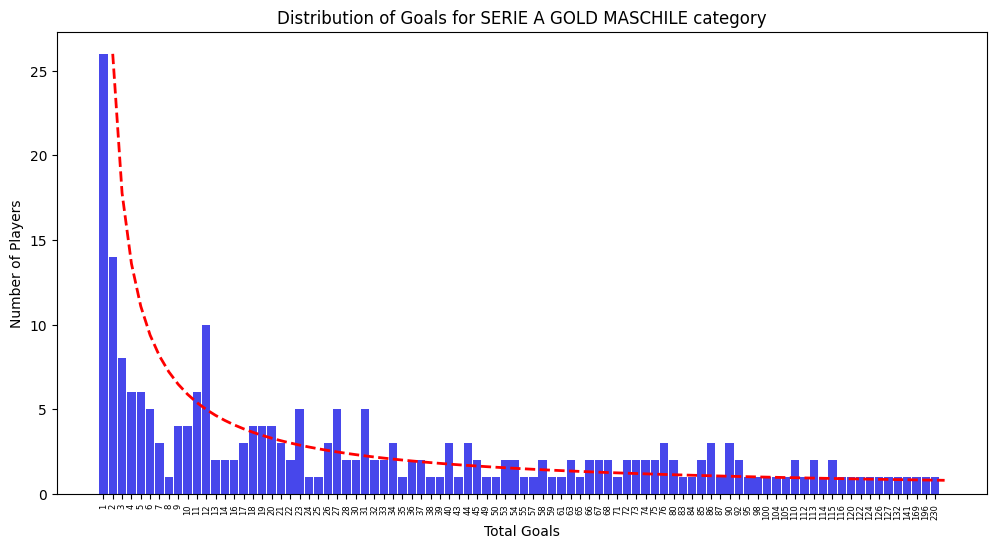

Text Version of Histogram:
1 goals: 26 players
2 goals: 14 players
3 goals: 8 players
4 goals: 6 players
5 goals: 6 players
6 goals: 5 players
7 goals: 3 players
8 goals: 1 players
9 goals: 4 players
10 goals: 4 players
11 goals: 6 players
12 goals: 10 players
13 goals: 2 players
14 goals: 2 players
16 goals: 2 players
17 goals: 3 players
18 goals: 4 players
19 goals: 4 players
20 goals: 4 players
21 goals: 3 players
22 goals: 2 players
23 goals: 5 players
24 goals: 1 players
25 goals: 1 players
26 goals: 3 players
27 goals: 5 players
28 goals: 2 players
30 goals: 2 players
31 goals: 5 players
32 goals: 2 players
33 goals: 2 players
34 goals: 3 players
35 goals: 1 players
36 goals: 2 players
37 goals: 2 players
38 goals: 1 players
39 goals: 1 players
40 goals: 3 players
43 goals: 1 players
44 goals: 3 players
45 goals: 2 players
49 goals: 1 players
50 goals: 1 players
53 goals: 2 players
54 goals: 2 players
55 goals: 1 players
57 goals: 1 players
58 goals: 2 players
59 goals: 1 players

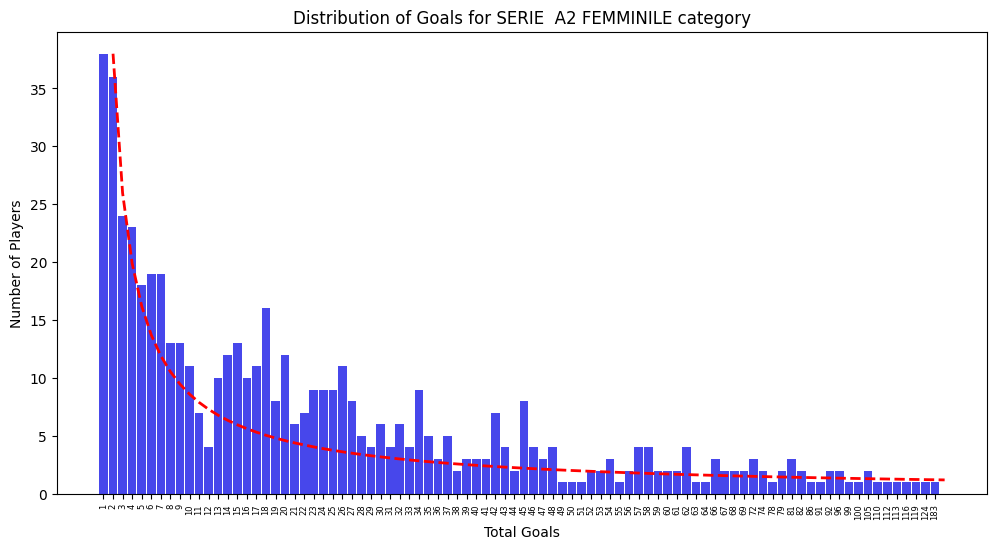

Text Version of Histogram:
1 goals: 38 players
2 goals: 36 players
3 goals: 24 players
4 goals: 23 players
5 goals: 18 players
6 goals: 19 players
7 goals: 19 players
8 goals: 13 players
9 goals: 13 players
10 goals: 11 players
11 goals: 7 players
12 goals: 4 players
13 goals: 10 players
14 goals: 12 players
15 goals: 13 players
16 goals: 10 players
17 goals: 11 players
18 goals: 16 players
19 goals: 8 players
20 goals: 12 players
21 goals: 6 players
22 goals: 7 players
23 goals: 9 players
24 goals: 9 players
25 goals: 9 players
26 goals: 11 players
27 goals: 8 players
28 goals: 5 players
29 goals: 4 players
30 goals: 6 players
31 goals: 4 players
32 goals: 6 players
33 goals: 4 players
34 goals: 9 players
35 goals: 5 players
36 goals: 3 players
37 goals: 5 players
38 goals: 2 players
39 goals: 3 players
40 goals: 3 players
41 goals: 3 players
42 goals: 7 players
43 goals: 4 players
44 goals: 2 players
45 goals: 8 players
46 goals: 4 players
47 goals: 3 players
48 goals: 4 players
49 g

In [13]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]
categories.append('ALL CATEGORIES')

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

def load_data(db_path, category=None):
    # Connect to SQLite database
    conn = sqlite3.connect(db_path)

    if category is None:
        # Convert SQLite table to a pandas dataframe
        df_players = pd.read_sql_query("SELECT * from Players", conn)
    else:
        # Convert SQLite tables to pandas dataframes
        df_players = pd.read_sql_query("SELECT * from Players", conn)
        df_teams = pd.read_sql_query("SELECT id, category from Teams", conn)

        # Merge player and team dataframes on team_id
        df_players = pd.merge(df_players, df_teams, left_on='team_id', right_on='id', suffixes=('_player', '_team'))

        df_players = df_players[df_players['category'] == category]

    # Filter out players with 0 goals
    df_players = df_players[df_players['goals'] != 0]

    return df_players, conn

def visualize_distribution(df_players, id_column, category=None):
    # Group players by the total number of goals and count the number of players in each group
    goals_distribution = df_players.groupby(id_column)['goals'].sum().value_counts().reset_index()

    goals_distribution.columns = ['Total Goals', 'Number of Players']

    # Sort the dataframe by the total number of goals
    goals_distribution = goals_distribution.sort_values('Total Goals')

    # Plot the distribution of goals
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=goals_distribution, x='Total Goals', y='Number of Players', color='blue', alpha=0.8, saturation=0.8, errorbar=None, width=0.9)

    if category is None:
        plt.title('Distribution of Goals')
    else:
        plt.title(f'Distribution of Goals for {category} category')

    plt.xlabel('Total Goals')
    plt.ylabel('Number of Players')

    # Rotate x-axis tick labels
    plt.xticks(rotation=90, fontsize=6)  # Set the font size of x-axis tick labels

    # Add a reference line for 1/x distribution
    max_goals_histogram = goals_distribution['Total Goals'].iloc[-1]  # Maximum number of goals in the histogram
    max_players = goals_distribution['Number of Players'].max()  # Maximum number of players for a certain goal count
    x = np.arange(1, max_goals_histogram + 1)  # X values for the 1/x distribution
    a = 0.005  # This can be any non-zero positive value
    b = 0.9  # This controls the steepness of the curve; values less than 1 make the curve less steep
    y = a / (x + b)**b * max_players  # 1/x distribution with a steepness parameter
    y = y / y.max() * max_players  # Scale the 1/x distribution so that its peak matches the peak of the histogram

    # Limit the x-values and y-values to match the last bar of the histogram
    x = x[:len(goals_distribution)]
    y = y[:len(goals_distribution)]

    plt.plot(x, y, color='red', linestyle='--', linewidth=2)


    plt.show()

    # Print the text version of the histogram
    print("Text Version of Histogram:")
    for index, row in goals_distribution.iterrows():
        print(f"{row['Total Goals']} goals: {row['Number of Players']:,} players")

def execute_visualization(button):
    db_path = 'fighDB.db'
    if category_dropdown.value == 'ALL CATEGORIES':
        df_players, conn = load_data(db_path)
        visualize_distribution(df_players, 'id')
    else:
        df_players, conn = load_data(db_path, category_dropdown.value)
        visualize_distribution(df_players, 'id_player', category_dropdown.value)

category_button.on_click(execute_visualization)


*Random Plots*:

Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Button(description='Confirm Category', style=ButtonStyle())

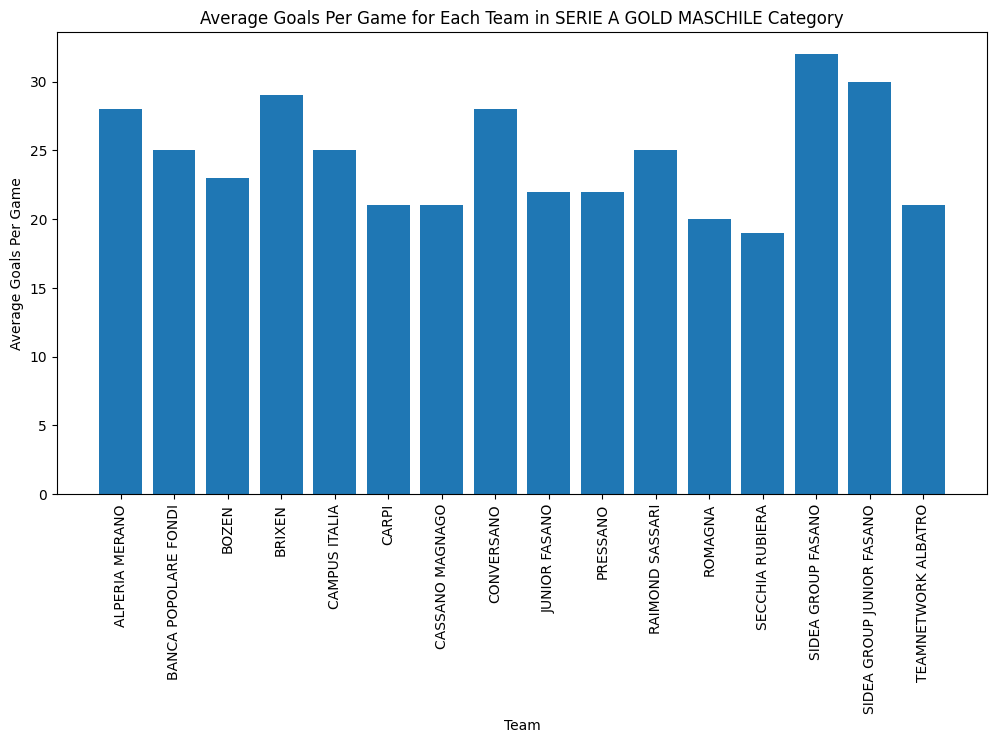

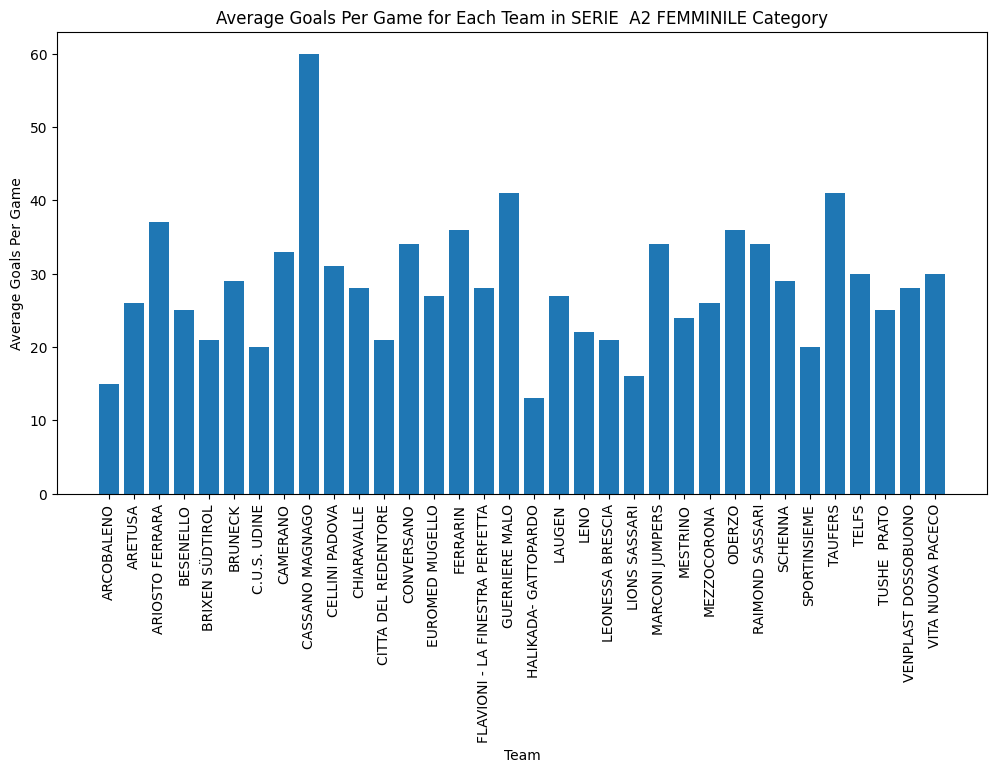

In [22]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]
categories.append('ALL CATEGORIES')

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

def plot_avg_goals_per_game(button):
    if category_dropdown.value == 'ALL CATEGORIES':
        # Query for average goals per game for each team
        c.execute('''
            SELECT t.team_name, SUM(p.goals) / COUNT(DISTINCT g.id) AS avg_goals
            FROM Teams t
            INNER JOIN Players p ON t.id = p.team_id
            INNER JOIN Games g ON g.id = p.game_id
            GROUP BY t.id
        ''')
    else:
        # Query for average goals per game for each team in the selected category
        c.execute('''
            SELECT t.team_name, SUM(p.goals) / COUNT(DISTINCT g.id) AS avg_goals
            FROM Teams t
            INNER JOIN Players p ON t.id = p.team_id
            INNER JOIN Games g ON g.id = p.game_id
            WHERE t.category = ? AND g.category = ?
            GROUP BY t.id
        ''', (category_dropdown.value, category_dropdown.value,))

    team_avg_goals = c.fetchall()
    df_team_avg_goals = pd.DataFrame(team_avg_goals, columns=['Team', 'Average Goals'])

    # Plot the average goals per game for each team
    plt.figure(figsize=(12, 6))
    plt.bar(df_team_avg_goals['Team'], df_team_avg_goals['Average Goals'])
    plt.xlabel('Team')
    plt.ylabel('Average Goals Per Game')
    plt.title(f'Average Goals Per Game for Each Team in {category_dropdown.value} Category')
    plt.xticks(rotation=90)
    plt.show()

category_button.on_click(plot_avg_goals_per_game)



Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Button(description='Confirm Category', style=ButtonStyle())

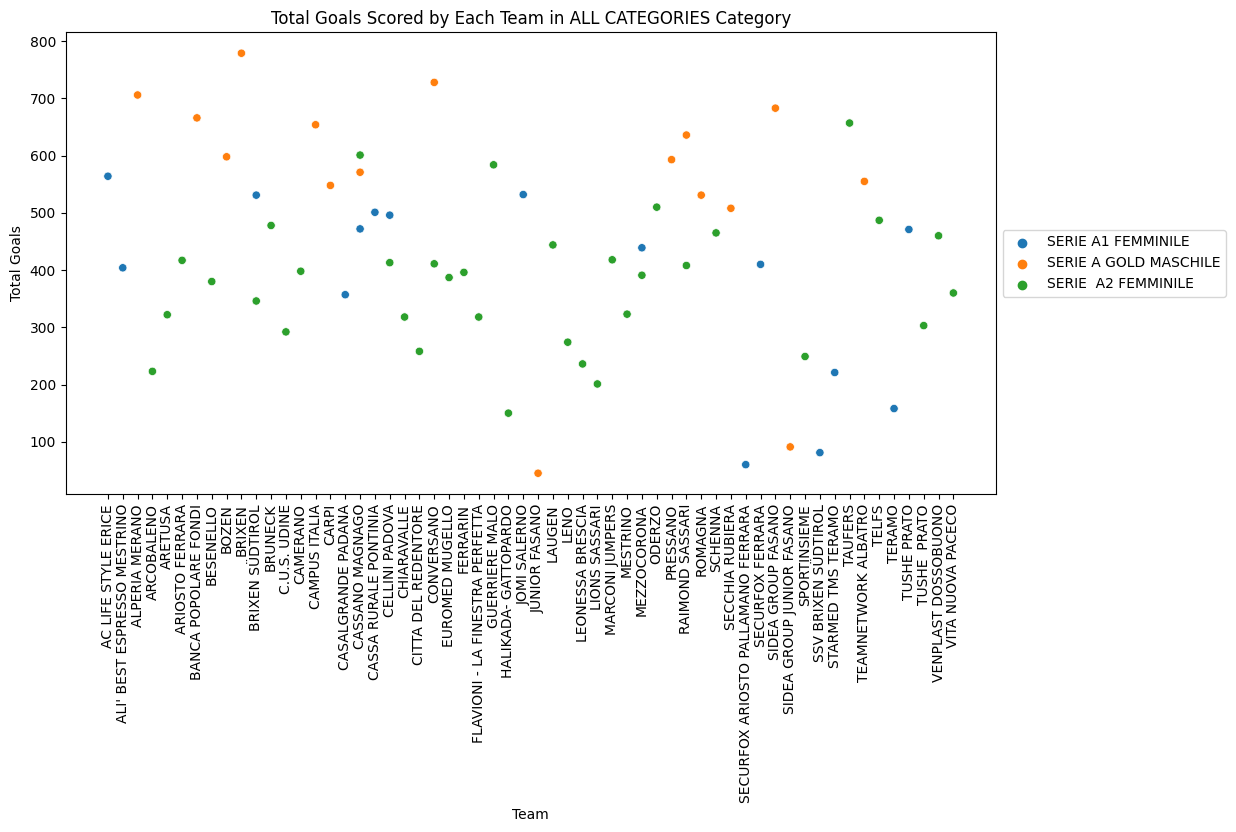

In [44]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]
categories.append('ALL CATEGORIES')

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

def plot_team_performance(button):
    if category_dropdown.value == 'ALL CATEGORIES':
        # Query for total goals for each team
        c.execute('''
            SELECT t.team_name, t.category, SUM(p.goals) AS total_goals
            FROM Teams t
            INNER JOIN Players p ON t.id = p.team_id
            INNER JOIN Games g ON g.id = p.game_id
            GROUP BY t.id
        ''')
    else:
        # Query for total goals for each team in the selected category
        c.execute('''
            SELECT t.team_name, t.category, SUM(p.goals) AS total_goals
            FROM Teams t
            INNER JOIN Players p ON t.id = p.team_id
            INNER JOIN Games g ON g.id = p.game_id
            WHERE t.category = ? AND g.category = ?
            GROUP BY t.id
        ''', (category_dropdown.value, category_dropdown.value,))

    team_total_goals = c.fetchall()
    df_team_total_goals = pd.DataFrame(team_total_goals, columns=['Team', 'Category', 'Total Goals'])

    # Plot the total goals for each team
    plt.figure(figsize=(12, 6))
    scatter_plot = sns.scatterplot(data=df_team_total_goals, x='Team', y='Total Goals', hue='Category')
    plt.xlabel('Team')
    plt.ylabel('Total Goals')
    plt.title(f'Total Goals Scored by Each Team in {category_dropdown.value} Category')
    plt.xticks(rotation=90)
    scatter_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
    plt.show()

category_button.on_click(plot_team_performance)


Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Button(description='Confirm Category', style=ButtonStyle())

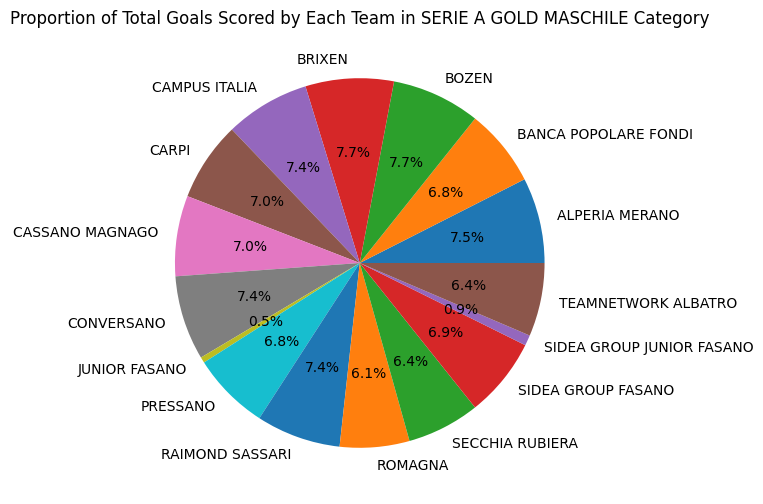

In [27]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]
categories.append('ALL CATEGORIES')

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

def plot_goal_proportions(button):
    if category_dropdown.value == 'ALL CATEGORIES':
        # Query for total goals for each team
        c.execute('''
            SELECT t.team_name, SUM(t.goals) AS total_goals
            FROM Teams t
            GROUP BY t.team_name
        ''')
    else:
        # Query for total goals for each team in the selected category
        c.execute('''
            SELECT t.team_name, SUM(t.goals) AS total_goals
            FROM Teams t
            WHERE t.category = ?
            GROUP BY t.team_name
        ''', (category_dropdown.value,))

    team_total_goals = c.fetchall()
    df_team_total_goals = pd.DataFrame(team_total_goals, columns=['Team', 'Total Goals'])

    # Plot the total goals for each team as a pie chart
    plt.figure(figsize=(12, 6))
    plt.pie(df_team_total_goals['Total Goals'], labels=df_team_total_goals['Team'], autopct='%1.1f%%')
    plt.title(f'Proportion of Total Goals Scored by Each Team in {category_dropdown.value} Category')
    plt.show()

category_button.on_click(plot_goal_proportions)


Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Button(description='Confirm Category', style=ButtonStyle())

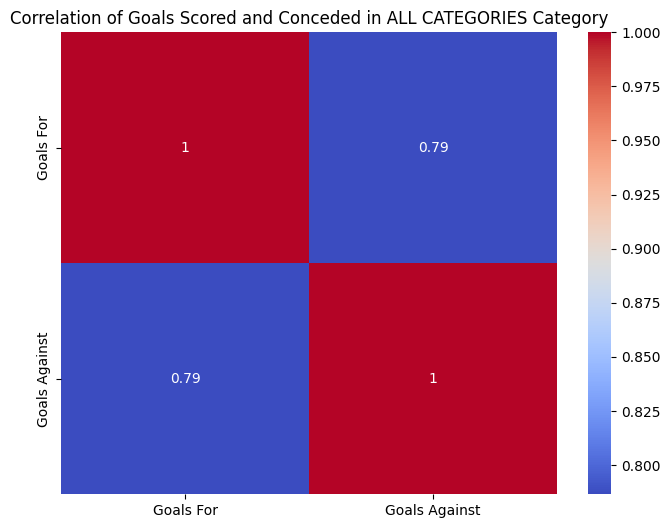

In [34]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]
categories.append('ALL CATEGORIES')

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

def plot_team_stats_heatmap(button):
    if category_dropdown.value == 'ALL CATEGORIES':
        # Query for total goals and goals against for each team
        c.execute('''
            SELECT t.team_name, t.goals AS goals_for, t.goals_against
            FROM Teams t
        ''')
    else:
        # Query for total goals and goals against for each team in the selected category
        c.execute('''
            SELECT t.team_name, t.goals AS goals_for, t.goals_against
            FROM Teams t
            WHERE t.category = ?
        ''', (category_dropdown.value,))

    team_stats = c.fetchall()
    df_team_stats = pd.DataFrame(team_stats, columns=['Team', 'Goals For', 'Goals Against'])
    df_team_stats.set_index('Team', inplace=True)

    # Calculate the correlation between goals for and goals against
    corr = df_team_stats.corr()

    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Correlation of Goals Scored and Conceded in {category_dropdown.value} Category')
    plt.show()

category_button.on_click(plot_team_stats_heatmap)


In [45]:
import sqlite3
import ipywidgets as widgets
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('fighDB.db')
c = conn.cursor()

# Get all unique categories
c.execute("SELECT DISTINCT category FROM Teams")
categories = [category[0] for category in c.fetchall()]

# Create the category dropdown menu
category_dropdown = widgets.Dropdown(options=categories, description='Category:')
display(category_dropdown)

# Create a button to confirm the category selection
category_button = widgets.Button(description="Confirm Category")
display(category_button)

# Function to display various statistics based on the selected category
def display_statistics(button):
    category = category_dropdown.value

    # Get the number of unique players in the selected category
    c.execute('''
        SELECT COUNT(DISTINCT p.name)
        FROM Players p
        INNER JOIN Teams t ON p.team_id = t.id
        WHERE t.category = ?
    ''', (category,))
    num_unique_players = c.fetchone()[0]

    # Get the number of unique games played in the selected category
    c.execute('''
        SELECT COUNT(DISTINCT p.game_id)
        FROM Players p
        INNER JOIN Games g ON p.game_id = g.id
        INNER JOIN Teams t ON p.team_id = t.id
        WHERE t.category = ?
    ''', (category,))
    num_unique_games = c.fetchone()[0]

    # Get the total number of goals scored in the selected category
    c.execute('''
        SELECT SUM(p.goals)
        FROM Players p
        INNER JOIN Teams t ON p.team_id = t.id
        WHERE t.category = ?
    ''', (category,))
    total_goals = c.fetchone()[0]

    # Get the average goals per game in the selected category
    c.execute('''
        SELECT AVG(p.goals)
        FROM Players p
        INNER JOIN Games g ON p.game_id = g.id
        INNER JOIN Teams t ON p.team_id = t.id
        WHERE t.category = ?
    ''', (category,))
    avg_goals_per_game = c.fetchone()[0]

    # Display the statistics
    print(f"Number of Unique Players in {category}: {num_unique_players}")
    print(f"Number of Unique Games Played in {category}: {num_unique_games}")
    print(f"Total Goals Scored in {category}: {total_goals}")
    print(f"Average Goals Per Game in {category}: {avg_goals_per_game:.2f}")

# Set the function to be called when the confirm button is clicked
category_button.on_click(display_statistics)


Dropdown(description='Category:', options=('SERIE A GOLD MASCHILE', 'SERIE  A2 FEMMINILE', 'SERIE A1 FEMMINILE…

Button(description='Confirm Category', style=ButtonStyle())